<a href="https://colab.research.google.com/github/khanh22mse23057/python4engineer-assignments/blob/main/FinalAssignments_Practice%26Build_API_with_Superstore_Sales_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập lớn kết thúc môn

##  *Đặt vấn đề*

Cho tập dữ liệu về doanh số bán hàng gồm các thông tin như sau:
[Input Data](https://drive.google.com/file/d/1QWD8rceAWo6KJYHh6Tx0eBtAM9U1EQno/view?usp=sharing(sad)

[Superstore Sales Dataset Analysis | Kaggle ](https://www.kaggle.com/code/adamossama/superstore-sales-dataset-analysis/data)
- order_id
- order_date
- ship_date
- ship_mode
- customer_id
- customer_name
- segment
- country
- city
- state
- region
- product_id
- sub-category
- product_name
- sales

Hãy sử dụng Python và Jupyter Notebook để trả lời các câu hỏi sau



## Cài đặt môi trường

In [1]:
# Trước hết, cần install Python và package Kaggle
# Một số functions trong bài không work với latest version, nên cài đặt packages version chỉ định như sau
!pip install opendatasets
# !pip install pandas==1.2.0
# !pip install pystan==3.0.0
!pip install pandas
!pip install pystan
!pip install kaggle
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1319 sha256=acbaea060c2db8774822d3b1b120c1b1c31d6a2efbdbc53a498e5b02ad58c402
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip



## Chuẩn bị dữ liệu
Để truy cập được tệp data từ Kaggle, cần phải tạo key và cấu hình môi trường

Ví dụ file secret key được tạo từ Kaggle và được lấy về từ github. Cách tạo key : https://prnt.sc/UCwb6zgoPzYT
* Lưu ý: Kaggle yêu cầu xác thực tài khoản bằng số điện thoại để cấp cấp quyền truy cập dữ liệu.

#### Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import itertools
import statsmodels.api as sm # Statsmodels là một gói Python cho phép người dùng khám phá dữ liệu : https://www.statsmodels.org/stable/index.html

import seaborn as sns # Dùng thêm lib này để vẽ biểu đồ cho đẹp ^.^
%matplotlib inline

# Load data
train_raw_url = "https://raw.githubusercontent.com/khanh22mse23057/kaggle-sales-dataset-train/main/superstore_sales.csv"

# Đọc dữ liệu từ file csv vào data frame
train_sales = pd.read_csv(train_raw_url)

train_sales.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### Load dữ liệu

Tìm hiểu dữ liệu đầu vào

In [31]:
print('-----------------------------train_sales-----------------------------------------')
train_sales.info()

print('-----------------------------Check Category--------------------------------------')
train_sales['Category'].value_counts()
print(train_sales['Category'].unique())

print('-----------------------------Check Sub-Category--------------------------------------')
print(train_sales['Sub-Category'].unique())
no_of_subcategory=train_sales['Sub-Category'].nunique()
print("Categories are divided into %d subcategories"%no_of_subcategory)


print('-----------------------------Check State--------------------------------------')
print(train_sales['State'].unique())
no_of_states=train_sales['State'].nunique()
print("There are %d states in this df."%no_of_states)

print('-----------------------------Check City--------------------------------------')
print(train_sales['City'].unique())
cities=train_sales['City'].nunique()
print("There are %d city in this df."%cities)




# train_sales['Segment'].value_counts()

-----------------------------train_sales-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   Order Date     9800 non-null   datetime64[ns] 
 3   Ship Date      9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   Customer Name  9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  Postal Code    9800 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product ID     9800 non-nu

In [4]:
train_sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
train_sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


==> Qua kết quả cho thấy dữ liệu OK ngoại trừ Postal Code có 11 dữ liệu ko tìm thấy trên tổng 9800 records

In [6]:
data = train_sales

## Câu 1.Tiền xử lý dữ liệu 
(xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...).

In [7]:
# Cleaning data
data["Postal Code"] = data["Postal Code"].fillna(0)
data["Order Date"] = pd.to_datetime(data["Order Date"], format="%d/%m/%Y")
data["Ship Date"] = pd.to_datetime(data["Ship Date"], format="%d/%m/%Y")

#formatting the date column correctly


# data.Order_Date= data["Order Date"].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%y'))
# data.Ship_Date= data["Ship Date"].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%y'))

train_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

## Câu 2.Vẽ biểu đồ thể hiện biến động doanh số theo tháng


Text(0, 0.5, 'Revenue (USD)')

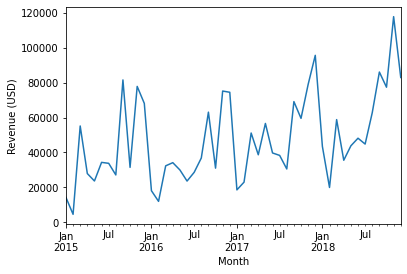

In [8]:
# Revenue by month
revenue_by_month = data.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum().plot()
revenue_by_month.set_xlabel("Month")
revenue_by_month.set_ylabel("Revenue (USD)")

Cho biết doanh thu trung bình trong 3 tháng gần nhất.

In [9]:
# Mean revenue in nearest 3 months
mean_revenue = data.sort_values(by="Order Date", ascending=True)\
    .set_index("Order Date")\
    .last("3M")["Sales"].mean()

print("Mean revenue in nearest 3 months: {} USD".format(round(mean_revenue, 2)))

Mean revenue in nearest 3 months: 230.29 USD


## Câu 3.Vẽ biểu đồ doanh số bán hàng theo quý 


Text(0, 0.5, 'Revenue (USD)')

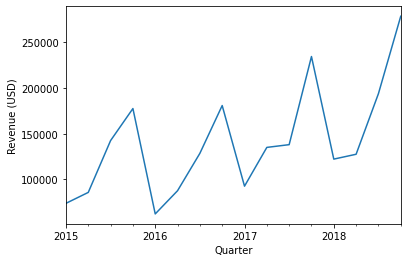

In [10]:
# Revenue by quarter
revenue_by_quarter_data = data.groupby(pd.Grouper(key="Order Date", freq="Q"))["Sales"].sum()
revenue_by_quarter = revenue_by_quarter_data.plot()
revenue_by_quarter.set_xlabel("Quarter")
revenue_by_quarter.set_ylabel("Revenue (USD)")

#### Xác định quý nào có tổng doanh số cao nhất

In [11]:
# Quarter with highest revenue
highest_quarter = revenue_by_quarter_data.idxmax()
highest_quarter_revenue = revenue_by_quarter_data[highest_quarter]

print("Quarter with highest revenue: {} with {} USD".format(highest_quarter, highest_quarter_revenue))

Quarter with highest revenue: 2018-12-31 00:00:00 with 278416.675 USD


## Câu 4.Tính thời gian trung giao hàng trung bình

Text(0, 0.5, 'Mean Delivery Time (Days)')

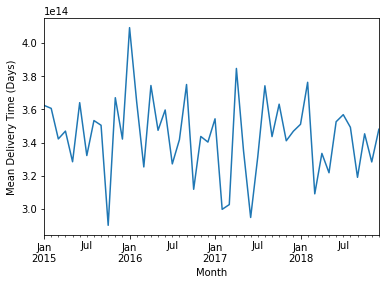

In [12]:
# Mean delivery time
data["Delivery Time"] = data["Ship Date"] - data["Order Date"]
mean_delivery_time_by_month = data.groupby(pd.Grouper(key="Order Date", freq="M"))["Delivery Time"].mean().plot()
mean_delivery_time_by_month.set_xlabel("Month")
mean_delivery_time_by_month.set_ylabel("Mean Delivery Time (Days)")

## Câu 5.Vẽ biểu đồ thể hiện sức mua theo từng thành phố

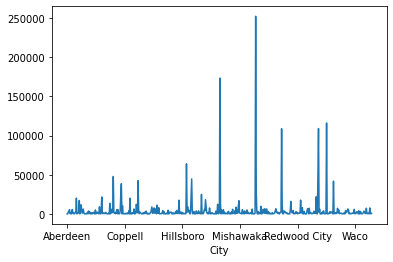

In [13]:
# Revenue by City
revenue_by_city_data = data.groupby("City")["Sales"].sum()
revenue_by_city = revenue_by_city_data.plot()

#### Xác định top 3 thành phố có doanh số thấp nhất


City
Abilene    1.392
Elyria     1.824
Jupiter    2.064
Name: Sales, dtype: float64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

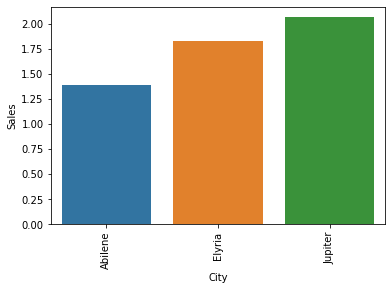

In [14]:
# Top 3 City with lowest revenue
worst_sales_city = revenue_by_city_data.nsmallest(3)
print(worst_sales_city)

sns.barplot(x='City',y='Sales',data=revenue_by_city_data.nsmallest(3).reset_index())
plt.xticks(rotation = 'vertical')

#### Xác định Top 3 thành phố có doanh số cao nhất

City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
Name: Sales, dtype: float64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

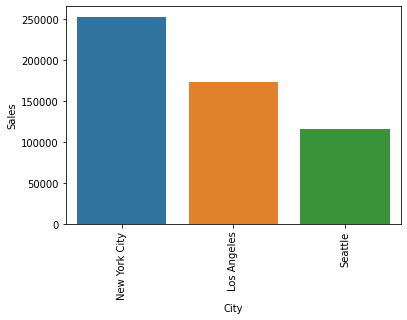

In [15]:
# Top 3 City with highest revenue
best_sales_cities = revenue_by_city_data.nlargest(3)
print(best_sales_cities)

sns.barplot(x='City',y='Sales',data=best_sales_cities.reset_index())
plt.xticks(rotation = 'vertical')

## Câu 6.Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state)

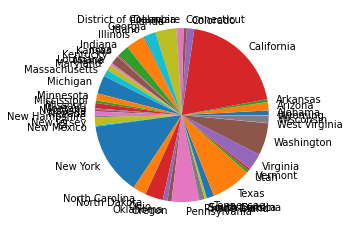

In [16]:
import matplotlib.patches as mpatches
# Percentage of revenue by State
revenue_by_state_data = data.groupby("State")["Sales"].sum()
revenue_by_state_data.plot(kind="pie")


In [17]:
total = revenue_by_state_data.sum()
total

2261536.7827

In [18]:
# width = 40
# height=10
# total= width * height

# proportions = [(float(value) / total) for value in revenue_by_state_data['State']]
# tiles_per_category = [round(proportion * total) for proportion in proportions]

#### Xác định trung bình doanh số của 5 bang dẫn đầu về sức mua.

In [19]:
# Mean of top 5 state
mean_sales_top_5_state = revenue_by_state_data.nlargest(5).mean()
print("Mean of top 5 state: {}".format(round(mean_sales_top_5_state, 2)))

Mean of top 5 state: 234544.73


## Câu 7.Cho biết các bang dẫn đầu doanh số theo từng vùng
(east, west, south, central,..)

In [20]:
# Top states in revenue by Region
revenue_by_region_state_data = data.groupby(["Region", "State"])["Sales"].sum().reset_index()
query_mask = revenue_by_region_state_data["Sales"] == revenue_by_region_state_data.groupby("Region")["Sales"].transform("max")
print(revenue_by_region_state_data[query_mask])

     Region       State        Sales
11  Central       Texas  168572.5322
21     East    New York  306361.1470
29    South     Florida   88436.5320
39     West  California  446306.4635


## Câu 8.Xác định top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất

In [21]:
# Top 3 products with highest revenue
# Cách 1:
sum_revenue_by_product = data.groupby(["Product ID", "Product Name"])["Sales"].sum()
print(sum_revenue_by_product.nlargest(3))

Product ID       Product Name                                                               
TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                          61599.824
OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
TEC-MA-10002412  Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Name: Sales, dtype: float64


In [22]:
#Cách 2:  => làm thêm
# productSales = data.groupby('Product ID').agg({'Sales': 'sum'}).sort_values('Sales',ascending=False)[:3]

# #Vẽ biểu đổ top 3 sản phẩm bán chạy
# sns.barplot(x='Product ID',y='Sales',data=productSales.reset_index())
# plt.xticks(rotation = 'vertical')

In [23]:
# Top 3 products with highest quantity
count_revenue_by_product = data.groupby(["Product ID", "Product Name"])["Sales"].count()
print(count_revenue_by_product.nlargest(3))

Product ID       Product Name                                             
FUR-CH-10002647  Situations Contoured Folding Chairs, 4/Set                   15
TEC-AC-10003628  Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
FUR-CH-10002880  Global High-Back Leather Tilter, Burgundy                    14
Name: Sales, dtype: int64


## Câu 9.Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category

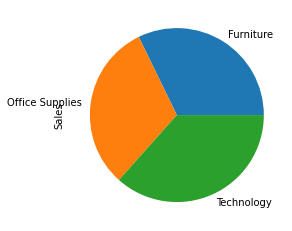

In [24]:
# Percentage of revenue by Category
revenue_by_category_data = data.groupby("Category")["Sales"].sum()
revenue_by_category_data.plot(kind="pie")

## Câu 10.Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: 
theo vùng, theo bang, theo category

In [37]:
#Theo dữ liệu đầu vào, quan sát trên dữ liệu category
# -----------------------------Check Category--------------------------------------
# ['Furniture' 'Office Supplies' 'Technology']

furniture = data.loc[data['Category']== 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,5 days
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,5 days


In [39]:
furniture.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Delivery Time'],
      dtype='object')

In [40]:
r_col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name',  'Delivery Time']

furniture.drop(r_col, axis =1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
furniture

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
3,2016-10-11,957.5775
5,2015-06-09,48.8600
10,2015-06-09,1706.1840
...,...,...
9786,2015-11-05,149.9000
9787,2018-03-27,1023.3320
9788,2018-03-27,600.5580
9790,2018-03-27,211.2460


In [43]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2015-01-06,2573.820
7660,2015-01-07,76.728
866,2015-01-10,51.940
716,2015-01-11,9.940
4938,2015-01-13,333.999
...,...,...
5457,2018-12-29,68.460
5131,2018-12-29,101.120
7636,2018-12-29,258.750
7632,2018-12-29,1207.840


In [44]:
furniture  = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2015-01-06,2573.820
2015-01-07,76.728
2015-01-10,51.940
2015-01-11,9.940
2015-01-13,333.999
...,...
2018-12-29,68.460
2018-12-29,101.120
2018-12-29,258.750


In [45]:
furniture_y = furniture['Sales'].resample('MS').mean()
furniture_y

Order Date
2015-01-01    327.225105
2015-02-01    262.808286
2015-03-01    445.105250
2015-04-01    305.570654
2015-05-01    288.032792
2015-06-01    453.261434
2015-07-01    327.910636
2015-08-01    309.791761
2015-09-01    425.294300
2015-10-01    384.507719
2015-11-01    357.850678
2015-12-01    419.689623
2016-01-01    782.662773
2016-02-01    284.943091
2016-03-01    335.486054
2016-04-01    317.445409
2016-05-01    312.498350
2016-06-01    301.638840
2016-07-01    350.436923
2016-08-01    301.206006
2016-09-01    456.098600
2016-10-01    333.271071
2016-11-01    397.335533
2016-12-01    362.099225
2017-01-01    346.488318
2017-02-01    206.607947
2017-03-01    306.816550
2017-04-01    377.488286
2017-05-01    363.233537
2017-06-01    355.729257
2017-07-01    339.723216
2017-08-01    425.359225
2017-09-01    330.314505
2017-10-01    256.804543
2017-11-01    392.390479
2017-12-01    446.402012
2018-01-01    269.552818
2018-02-01    270.975096
2018-03-01    286.669600
2018-04-01    

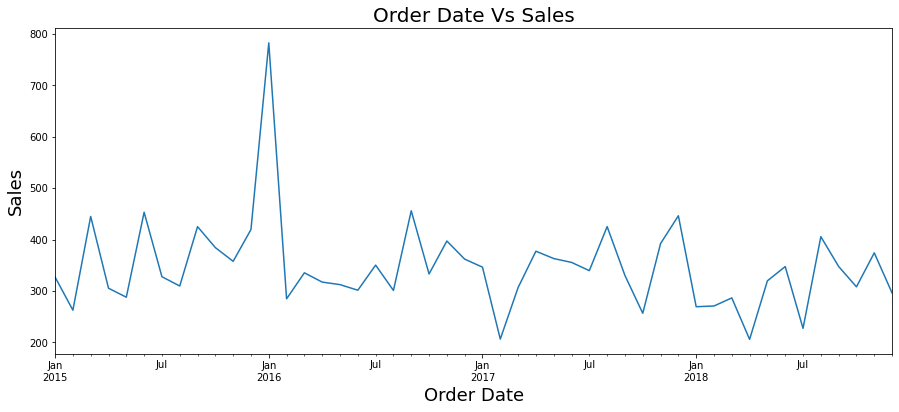

In [46]:
furniture_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()


In [47]:
from pylab import rcParams as rc
rc['figure.figsize']= 10, 14
decomposition = sm.tsa.seasonal_decompose(furniture_y,model='additive')

# y(t) = Level + Trend + Seasonality + Noise --> Additive
print("Trend \n ")
print(decomposition.trend)
print("Seasonal \n ")
print(decomposition.seasonal)
print("Residual \n ")
print(decomposition.resid)
print("Observed \n ")
print(decomposition.observed)

Trend 
 
Order Date
2015-01-01           NaN
2015-02-01           NaN
2015-03-01           NaN
2015-04-01           NaN
2015-05-01           NaN
2015-06-01           NaN
2015-07-01    377.897256
2015-08-01    397.796109
2015-09-01    394.150926
2015-10-01    390.078241
2015-11-01    391.592421
2015-12-01    386.294211
2016-01-01    380.915198
2016-02-01    381.496054
2016-03-01    382.421826
2016-04-01    381.570479
2016-05-01    381.080821
2016-06-01    380.326423
2016-07-01    359.752887
2016-08-01    338.314987
2016-09-01    333.856460
2016-10-01    335.163684
2016-11-01    339.779437
2016-12-01    344.147170
2017-01-01    345.954533
2017-02-01    350.681180
2017-03-01    350.613227
2017-04-01    342.186117
2017-05-01    338.793968
2017-06-01    342.100540
2017-07-01    342.407510
2017-08-01    341.883829
2017-09-01    343.726337
2017-10-01    335.743390
2017-11-01    326.796582
2017-12-01    324.654535
2018-01-01    319.640522
2018-02-01    314.148871
2018-03-01    314.059594
2018-

<function matplotlib.pyplot.show(*args, **kw)>

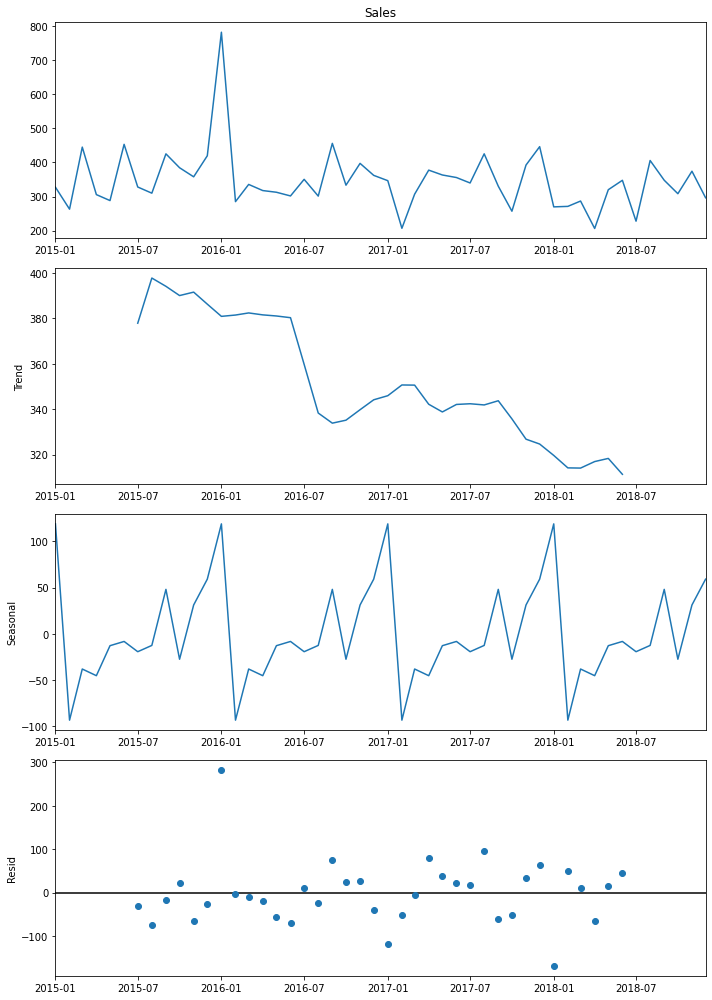

In [48]:
fig = decomposition.plot()
plt.show

In [49]:
p=d=q=range(0,2)
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [50]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [52]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [53]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(furniture_y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 688.2727988777473


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1747.6913149353381
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 426.24100335321197
ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 269.72976082229656
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 451.7672519195212
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 420.70429654167555
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 293.21796372966185
ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 271.723159893868
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 638.9354799709242


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2696.830193575839
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 416.2189924183683
ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 260.1944512935929


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 453.99279934019023


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 410.8822340758337
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 295.19430119774455
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 262.19046463118536
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 578.049435051341
ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1517.228029303214
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 433.17452414717553


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 270.9211168748066
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 435.0653478561736


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1413.4597840557508
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 291.64023419659304
ARIMA(0, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 272.8779631559205
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 538.0637124799227
ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2425.0507523333044


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 410.26743087575727
ARIMA(0, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 251.44358973197996
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 419.07201295457935


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2263.0022798866476
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 271.46263126327796
ARIMA(0, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 253.40901900874522
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 590.2816594577193
ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1643.2403422954867
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 427.7404610912701


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 271.1286179018499
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 419.9797592324166
ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 421.93514069914255
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 271.1287478460719
ARIMA(1, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 273.1283390111658
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 552.9998685806055


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2674.061140764317
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 417.8757693900543
ARIMA(1, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 261.6105271664384
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 421.95423311122875
ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 386.08634551249804
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 273.3977750346085
ARIMA(1, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 262.64179375799455
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 567.9552382719255


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1012.4506640210043
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 432.67462184765674
ARIMA(1, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 272.21762150806177
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 397.51972421334955


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1293.214956915366
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 272.22624407933654
ARIMA(1, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 274.20040546138773
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 540.0391017396573


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 1910.848170805344
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 411.544389159725
ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 253.32914632916268
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 388.2493345908373
ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2114.952690264373
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 262.2703104210095
ARIMA(1, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 255.30058198276396


ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 255.30058198276396 ---> Best Parameter

In [54]:
mod = sm.tsa.statespace.SARIMAX(furniture_y,
                               order=(1,1,1),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0041      0.250     -0.016      0.987      -0.495       0.486
ma.L1         -1.0000      0.411     -2.431      0.015      -1.806      -0.194
ar.S.L12      -0.0008      0.100     -0.008      0.993      -0.197       0.195
sigma2      5867.9865   7.01e-05   8.37e+07      0.000    5867.986    5867.987


In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

**ỨNG DỤNG MÔ HÌNH ARIMA ĐỂ DỰ BÁO**

# Triển khai API